In [ ]:
import bs4
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys

In [2]:
driver = webdriver.Chrome()
driver.get('https://www.google.com/flights/explore/')

In [27]:
to_input = driver.find_element_by_xpath('//*[@id="root"]/div[3]/div[3]/div/div[4]/div/div')
to_input.click()

In [28]:
actions = ActionChains(driver)
#implement code from "from place" might not use New York which is the default

#implement code for to location
actions.send_keys('Mexico')


actions.send_keys(Keys.ENTER)
actions.perform()

In [34]:
results = driver.find_elements_by_class_name('LJTSM3-v-d')
test = results[0]
bars = test.find_elements_by_class_name('LJTSM3-w-x')
print len(results)
results[:2]

11


[<selenium.webdriver.remote.webelement.WebElement (session="751eeb54c29f903a66478d6ba6d3dd0d", element="0.062640673814927-2")>,
 <selenium.webdriver.remote.webelement.WebElement (session="751eeb54c29f903a66478d6ba6d3dd0d", element="0.062640673814927-3")>]

In [35]:
test.text

u'Best price $247\nNonstop $247\nCanc\xfan, Mexico\n$606\n$247\nApril\nMay'

In [40]:
import time
data = []

for bar in bars:
    ActionChains(driver).move_to_element(bar).perform()
    time.sleep(0.001)
    data.append((test.find_element_by_class_name('LJTSM3-w-k').find_elements_by_tag_name('div')[0].text,
           test.find_element_by_class_name('LJTSM3-w-k').find_elements_by_tag_name('div')[1].text))

In [15]:
print data[:5]
data[-5:]

[(u'$281', u'Sun Apr 2 - Wed Apr 5'), (u'$281', u'Mon Apr 3 - Sat Apr 8'), (u'$281', u'Tue Apr 4 - Sat Apr 8'), (u'$281', u'Wed Apr 5 - Mon Apr 10'), (u'$384', u'Thu Apr 6 - Sun Apr 9')]


[(u'$415', u'Sat May 27 - Thu Jun 1'),
 (u'$315', u'Sun May 28 - Thu Jun 1'),
 (u'$302', u'Mon May 29 - Fri Jun 2'),
 (u'$302', u'Tue May 30 - Fri Jun 2'),
 (u'$368', u'Wed May 31 - Sat Jun 3')]

In [41]:
import pandas as pd
import datetime
%matplotlib inline
from dateutil.parser import parse
d = data[0]
clean_data = [(float(d[0].replace('$', '').replace(',', '')), (parse(d[1].split('-')[0].strip()) - datetime.datetime(2017,3,13,0,0)).days, reduce(lambda x,y: y-x, [parse(x.strip()) for x in d[1].split('-')]).days) for d in data]

In [42]:
df = pd.DataFrame(clean_data, columns=['Price', 'Start_Date', 'Trip_Length'])

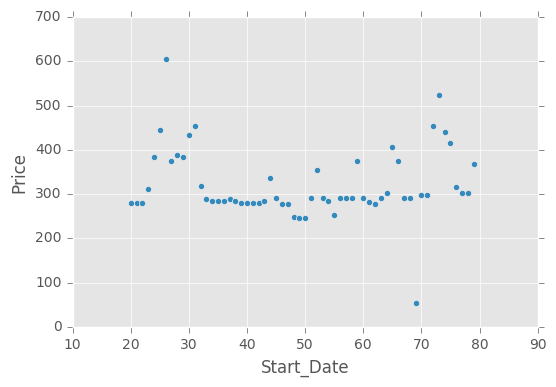

In [53]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')

# Pandas has a ton of built-in visualizations
# Play and Learn
# http://pandas.pydata.org/pandas-docs/stable/visualization.html
df.plot.scatter(x='Start_Date', y='Price')

df = df.set_value(49, 'Price', 55)
# Time for a Google Investigation
# "IQR Outlier"